In [81]:
import joblib

import pandas as pd
import seaborn as sns
import yfinance as yf

from datetime import datetime
from sklearn import linear_model
from matplotlib import pyplot as plt

Read csv files

In [51]:
df_BTC_2017 = pd.read_csv("archive/BTC-2017min.csv")
df_BTC_2018 = pd.read_csv("archive/BTC-2018min.csv")
df_BTC_2019 = pd.read_csv("archive/BTC-2019min.csv")
df_BTC_2020 = pd.read_csv("archive/BTC-2020min.csv")
df_BTC_2021 = pd.read_csv("archive/BTC-2021min.csv")
df_BTC_daily = pd.read_csv("archive/BTC-Daily.csv")

Concat all datafremes

In [4]:
concat_BTC = pd.concat([df_BTC_2017, df_BTC_2018], axis=0)
concat_BTC = pd.concat([concat_BTC, df_BTC_2019], axis=0)
concat_BTC = pd.concat([concat_BTC, df_BTC_2020], axis=0)
concat_BTC = pd.concat([concat_BTC, df_BTC_2021], axis=0)

Sort BTC dataframe by date

In [5]:
concat_BTC["date"] = pd.to_datetime(concat_BTC["date"])
BTC_df = concat_BTC.sort_values(by="date")
BTC_df.drop(columns=["unix", "symbol"], inplace=True)

BTC_df.head()

,date,open,high,low,close,Volume BTC,Volume USD
525598,2017-01-01 00:01:00,966.34,966.34,966.34,966.34,7.610000,7353.847400
525597,2017-01-01 00:02:00,966.16,966.37,966.16,966.37,8.087376,7815.397864
525596,2017-01-01 00:03:00,966.37,966.37,966.37,966.37,0.000000,0.000000
525595,2017-01-01 00:04:00,966.37,966.37,966.37,966.37,0.000000,0.000000
525594,2017-01-01 00:05:00,966.43,966.43,966.43,966.43,0.107000,103.408010


Cleaning Data

In [6]:
BTC_df.isnull().sum()

date          0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [7]:
BTC_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2675301 entries, 525598 to 0
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   open        float64       
 2   high        float64       
 3   low         float64       
 4   close       float64       
 5   Volume BTC  float64       
 6   Volume USD  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 163.3 MB


Checking for Null Values

In [8]:
print("Null values:", BTC_df.isnull().values.sum())

Null values: 0


In [9]:
print("NaN values:", BTC_df.isnull().values.any())

NaN values: False


In [10]:
#criar as funções que limpam os dados mesmo assim 

Exploratory Data Analysis

In [11]:
#print the start date and the end  date

start_date = BTC_df.iloc[0][1]
end_date = BTC_df.iloc[-1][1]

print("Start date:", start_date)
print("End date:", end_date)

Start date: 966.34
End date: 43046.58


In [97]:
BTC_df_date = BTC_df.copy()
BTC_df_date["date"] = pd.to_datetime(BTC_df_date["date"])

BTC_df_date.head()

,date,open,high,low,close,Volume BTC,Volume USD
525598,2017-01-01 00:01:00,966.34,966.34,966.34,966.34,7.610000,7353.847400
525597,2017-01-01 00:02:00,966.16,966.37,966.16,966.37,8.087376,7815.397864
525596,2017-01-01 00:03:00,966.37,966.37,966.37,966.37,0.000000,0.000000
525595,2017-01-01 00:04:00,966.37,966.37,966.37,966.37,0.000000,0.000000
525594,2017-01-01 00:05:00,966.43,966.43,966.43,966.43,0.107000,103.408010


In [13]:

BTC_df_date["hours"] = BTC_df_date["date"].dt.strftime('%H')
BTC_df_date["minutes"] = BTC_df_date["date"].dt.strftime('%M')

new_order = ['date', 'hours', 'minutes', 'open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD']
BTC_df_date = BTC_df_date[new_order]

BTC_df_date.head()

,date,hours,minutes,open,high,low,close,Volume BTC,Volume USD
525598,2017-01-01 00:01:00,00,01,966.34,966.34,966.34,966.34,7.610000,7353.847400
525597,2017-01-01 00:02:00,00,02,966.16,966.37,966.16,966.37,8.087376,7815.397864
525596,2017-01-01 00:03:00,00,03,966.37,966.37,966.37,966.37,0.000000,0.000000
525595,2017-01-01 00:04:00,00,04,966.37,966.37,966.37,966.37,0.000000,0.000000
525594,2017-01-01 00:05:00,00,05,966.43,966.43,966.43,966.43,0.107000,103.408010


Data Describe

In [14]:
cols = ['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD']
BTC_df_date[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
open,2675301.0,16209.934130,17422.284122,752.00,5599.040000,8703.120000,15500.000000,6.900000e+04
high,2675301.0,16219.884786,17432.005397,752.81,5602.000000,8709.860000,15510.000000,6.900000e+04
low,2675301.0,16199.614220,17412.357549,751.34,5594.980000,8696.910000,15487.930000,6.879999e+04
close,2675301.0,16209.956812,17422.441952,752.04,5598.880000,8702.810000,15500.000000,6.900000e+04
Volume BTC,2675301.0,6.130515,16.292996,0.00,0.251895,1.467694,5.507826,1.616060e+03
Volume USD,2675301.0,70794.025116,203035.282225,0.00,2244.546085,14664.666104,58659.083903,1.396792e+07


Correlação

In [15]:
BTC_df_date.corr()

,date,hours,minutes,open,high,low,close,Volume BTC,Volume USD
date,1.000000,0.000490,0.000003,0.779437,0.779404,0.779484,0.779437,-0.124351,0.132140
hours,0.000490,1.000000,0.000017,0.000331,0.000360,0.000295,0.000332,0.035704,0.030170
minutes,0.000003,0.000017,1.000000,-0.000007,-0.000029,0.000014,-0.000008,-0.014853,-0.014346
open,0.779437,0.000331,-0.000007,1.000000,0.999999,0.999999,0.999999,-0.100665,0.193483
high,0.779404,0.000360,-0.000029,0.999999,1.000000,0.999998,0.999999,-0.100439,0.193935
low,0.779484,0.000295,0.000014,0.999999,0.999998,1.000000,0.999999,-0.100938,0.192952
close,0.779437,0.000332,-0.000008,0.999999,0.999999,0.999999,1.000000,-0.100687,0.193455
Volume BTC,-0.124351,0.035704,-0.014853,-0.100665,-0.100439,-0.100938,-0.100687,1.000000,0.652679
Volume USD,0.132140,0.030170,-0.014346,0.193483,0.193935,0.192952,0.193455,0.652679,1.000000


['date', 'hours', 'minutes', 'open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD']


<Axes: >

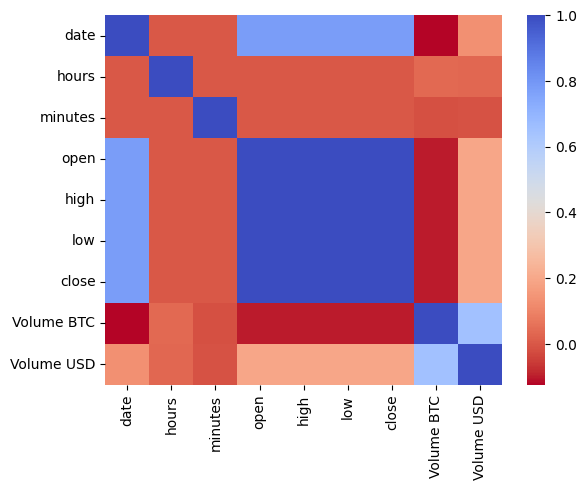

In [16]:
atributos = list(BTC_df_date.columns)
print(atributos)
sns.heatmap(BTC_df_date[atributos[:]].corr(), cmap='coolwarm_r')

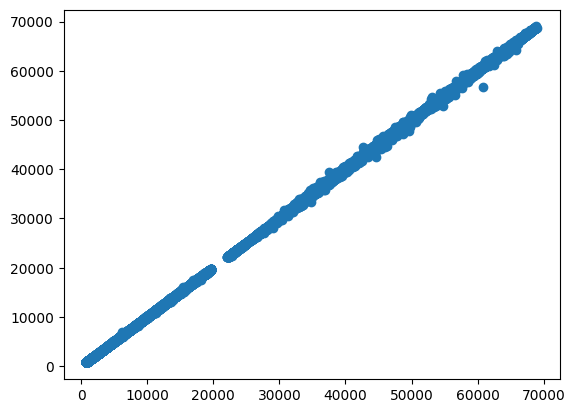

In [23]:

plt.scatter(BTC_df_date["open"].values, BTC_df_date["close"].values)

Modelo de Regressao Linear(high)

In [79]:
x = df_BTC_daily["open"].values.reshape(-1, 1)
y = df_BTC_daily["high"].values

predict_teste_values = [[966.34], [912], [320]]

model_high = linear_model.LinearRegression()
model_high.fit(x, y)


LinearRegression()

In [80]:
joblib.dump(model_high, "models/high_model.pkl")
loaded_model = joblib.load("models/high_model.pkl") 

pred = loaded_model.predict(predict_teste_values)
print(pred)

[1009.75562137  953.88596481  345.22132212]


Modelo de Regressão Linear(Close)

In [74]:
x = df_BTC_daily["open"].values.reshape(-1, 1)
y = df_BTC_daily["close"].values

model_close = linear_model.LinearRegression()
model_close.fit(x, y)

LinearRegression()

In [75]:
joblib.dump(model_close, "models/close_model.pkl")
loaded_model = joblib.load("models/close_model.pkl") 

pred = loaded_model.predict(predict_teste_values)
print(pred)

[988.5569556  934.247756   342.58330696]


Modelo de Regressão Linear(Low)

In [76]:
x = df_BTC_daily["open"].values.reshape(-1, 1)
y = df_BTC_daily["low"].values

model_low = linear_model.LinearRegression()
model_low.fit(x, y)

LinearRegression()

In [77]:
joblib.dump(model_low, "models/low_model.pkl")
loaded_model = joblib.load("models/low_model.pkl") 

pred = loaded_model.predict(predict_teste_values)
print(pred)

[945.59374585 893.15799583 321.90359733]


Proço do bitcoin hoje

In [103]:
bitcoin = yf.Ticker("BTC-USD")
historical_data = bitcoin.history(period="1d")

price_open = historical_data['Open'].iloc[0] if not historical_data.empty else None
price_open_ = [[price_open]]

high_model = joblib.load("models/high_model.pkl")
low_model = joblib.load("models/low_model.pkl") 
close_model = joblib.load("models/close_model.pkl")  

high_pred = high_model.predict(price_open_)
low_pred = low_model.predict(price_open_)
close_pred = close_model.predict(price_open_)

print(f"Preço de abertura do Bitcoin hoje: ${price_open}")
print(f"Preço mais alto previsto para o Bitcoin hoje: ${high_pred[0]}")
print(f"Preço mais baixo previsto para o Bitcoin hoje: ${low_pred[0]}")
print(f"Preço de fechamento do Bitcoin hoje: ${close_pred[0]}")


Preço de abertura do Bitcoin hoje: $69346.71875
Preço mais alto previsto para o Bitcoin hoje: $71315.02386341515
Preço mais baixo previsto para o Bitcoin hoje: $66929.70207678182
Preço de fechamento do Bitcoin hoje: $69330.1770887245
